In [50]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [51]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [52]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [53]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [54]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [55]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [56]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [57]:
# Create our session (link) from Python to the DB
session = Session(bind=engine)

# Exploratory Precipitation Analysis

In [58]:
# Find the most recent date in the data set.
recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
recent_date

('2017-08-23',)

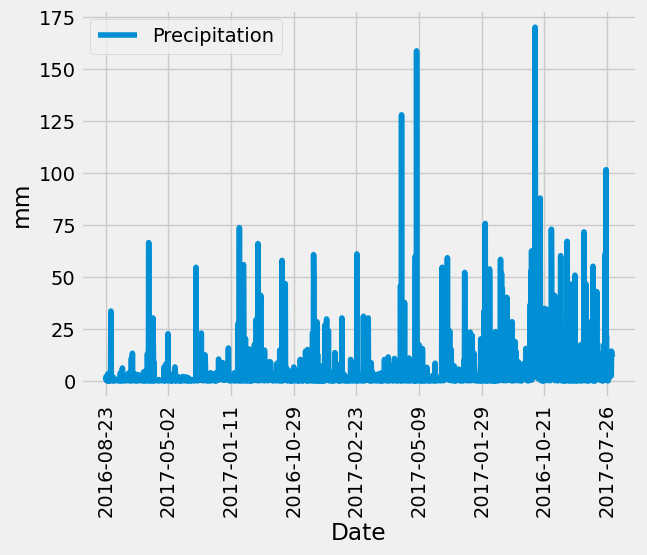

In [59]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database.
# Calculate the date one year from the last date in data set.
last_12_months = dt.datetime.strptime(recent_date[0],'%Y-%m-%d').date() - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
prcp_result = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date>=last_12_months).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
prcp_df = pd.DataFrame(prcp_result, columns=['Date', 'Precipitation']).set_index('Date').dropna()

# Sort the dataframe by date
prcp_df.sort_values("Date", ascending = True)

# Use Pandas Plotting with Matplotlib to plot the data
prcp_df.plot()
plt.ylabel("mm")
plt.xticks(rotation=90)
plt.show()

In [60]:
# Use Pandas to calculate the summary statistics for the precipitation data
prcp_df.describe()

,Precipitation
count,2021.000000
mean,4.505888
std,11.713487
min,0.000000
25%,0.000000
50%,0.500000
75%,3.300000
max,170.200000


# Exploratory Station Analysis

In [61]:
# Design a query to calculate the total number of stations in the dataset
session.query(func.count(Station.id)).all()


[(9,)]

In [62]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
session.query(Measurement.station,func.count(Measurement.station)).\
    group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [63]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
    group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).first()

(12.2, 29.4, 22.03582251082252)

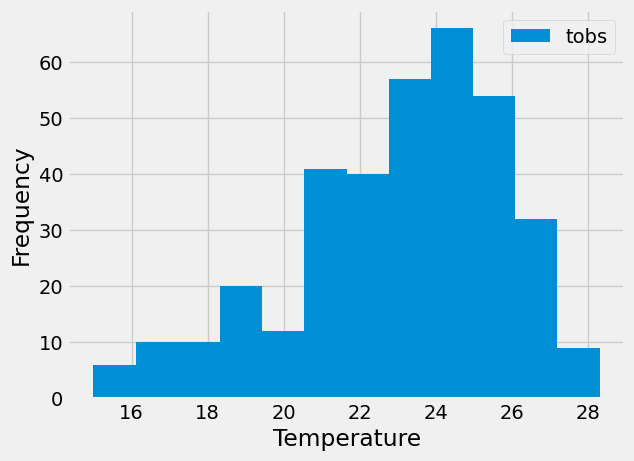

In [64]:
# Get the most active station id
mostActiveStation = session.query(Measurement.station).group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).first()

# Get the recent date from the most active station id
latest_date = session.query(Measurement.date).filter(Measurement.station == mostActiveStation[0]).order_by(Measurement.date.desc()).first()

# Get the last 12 month date from the most active station id
last_year = dt.datetime.strptime(latest_date[0],'%Y-%m-%d').date() - dt.timedelta(days=365)

# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
tobs_result = session.query(Measurement.tobs).filter(Measurement.date>=last_year, Measurement.station == mostActiveStation[0]).all()

# Store tobs results into dataframe
tobs_df = pd.DataFrame(tobs_result, columns = ['tobs'])

# Plot histogram with bin=12
tobs_df.plot.hist(bins=12)
plt.xlabel("Temperature")
plt.show()

# Close Session

In [65]:
# Close Session
session.close()